In [1]:
#######################################################################################################
import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import os
import sys

# Get the current notebook's directory
notebook_dir = os.path.abspath('')
# Add the relative path to your Codes directory
codes_path = os.path.join(notebook_dir, "..", "Codes")
codes_path = os.path.abspath(codes_path)  # Normalize the path
# Add to path if not already there
if codes_path not in sys.path:
    sys.path.insert(1, codes_path)
from myUtils import *

MAINPATH is set to: /home/emanuele/Research/APES/FHN/


In [2]:
codes_path

'/home/emanuele/Research/APES/Forest_Human_Nexus/Codes'

In [3]:
# Import world boundaries
fName = os.path.join(MAINPATH, 'Data/SHAPEFILES/world-administrative-boundaries.shp')
gdf = gpd.read_file(fName)
gdf = gdf.to_crs("ESRI:54009")

In [4]:
# Import FHN data #
df5 = returnDF()   ###### 

Enter the index value for j: 0: Proximiy, 1: Population, 2: Forest, 3: FAP, 4: FHN, 5: FPP ---->   4


In [5]:
df5.head()

,year,region,mean,median,stdev,all_vals,sum
0,1975,Central Asia,0.131967,0.091887,0.132122,"[0.09475045, 0.2077287, 0.18659146, 0.12055872...",70.602600
1,1975,Eastern Africa,0.336033,0.261027,0.265327,"[0.1682286, 0.10217052, 0.10398979, 0.3193536,...",789.676575
2,1975,Eastern Asia,0.325251,0.274375,0.245965,"[1.0, 0.6664793, 0.5710462, 0.60855675, 1.0, 1...",730.188721
3,1975,Eastern Europe,0.490662,0.439505,0.310716,"[0.3024216, 0.4552799, 0.25970384, 0.0638698, ...",2400.317139
4,1975,Middle Africa,0.567357,0.548065,0.348435,"[0.04522211, 0.0269236, 0.18469903, 0.08054382...",1358.252319


<Axes: xlabel='year'>

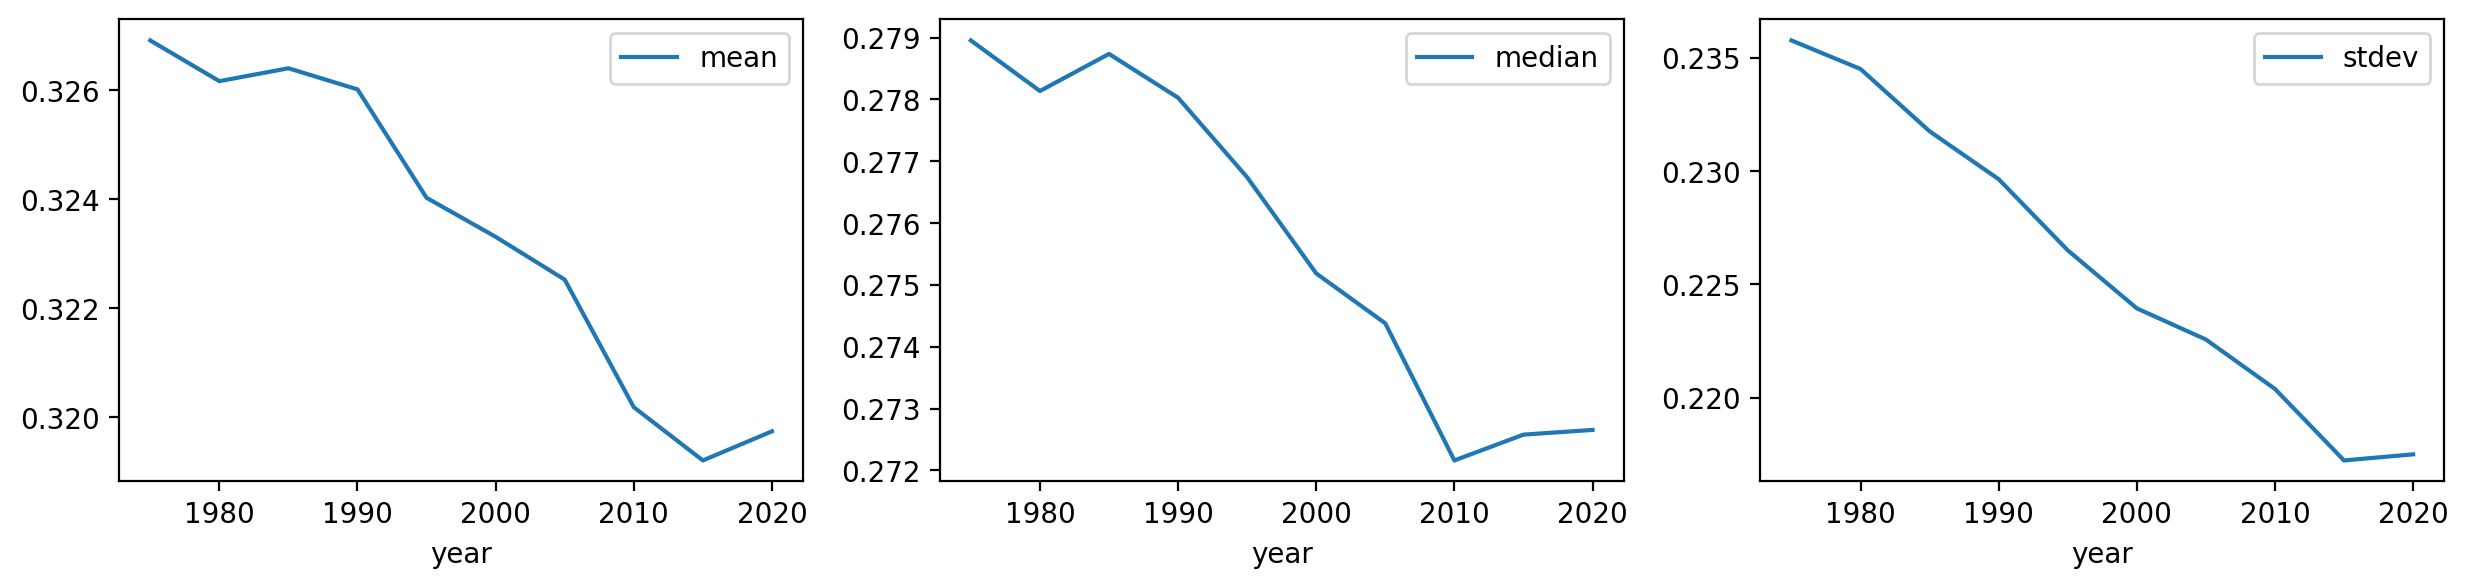

In [6]:
f,axs=plt.subplots(1,3, figsize=(15,3))
ax=axs[0]
df_std = df5.groupby('year')['mean'].mean().reset_index()
df_std.plot(x='year', y='mean', ax=ax)

ax=axs[1]
df_std = df5.groupby('year')['median'].mean().reset_index()
df_std.plot(x='year', y='median', ax=ax)

ax=axs[2]
df_std = df5.groupby('year')['stdev'].mean().reset_index()
df_std.plot(x='year', y='stdev', ax=ax)

In [7]:
# Create a dictionary to map each region to its continent
# Mapping regions to continents
continent_colors = {
    'Asia': '#D55E00',      # Vermilion
    'Africa': '#0072B2',    # Blue
    'Europe': '#009E73',    # Green
    'America': '#F0E442',   # Yellow
    'Oceania': '#CC79A7'    # Reddish-purple
}


region_to_continent = {'Central Asia': 'Asia', 'Eastern Africa': 'Africa','Eastern Asia': 'Asia','Eastern Europe': 'Europe',
                        'Middle Africa': 'Africa', 'Northern Africa': 'Africa', 'Northern America': 'America',
                        'Northern Europe': 'Europe', 'Oceania': 'Oceania', 'South America': 'America', 'South-Eastern Asia': 'Asia',
                        'Southern Africa': 'Africa', 'Southern Asia': 'Asia', 'Southern Europe': 'Europe', 'Western Africa': 'Africa',
                        'Western Asia': 'Asia', 'Western Europe': 'Europe'}

colors = {
    'South-Eastern Asia': 'darkred',
    'Middle Africa': 'darkred',
    'South America': 'darkred',
    'Southern Europe': 'navy',
    'Western Europe': 'navy',
    'Southern Asia': 'navy'
}

linestyles = {
    'South-Eastern Asia': '-',
    'Middle Africa': '--',
    'South America': ':',
    'Southern Europe': '-',
    'Western Europe': '--',
    'Southern Asia': ':'
}



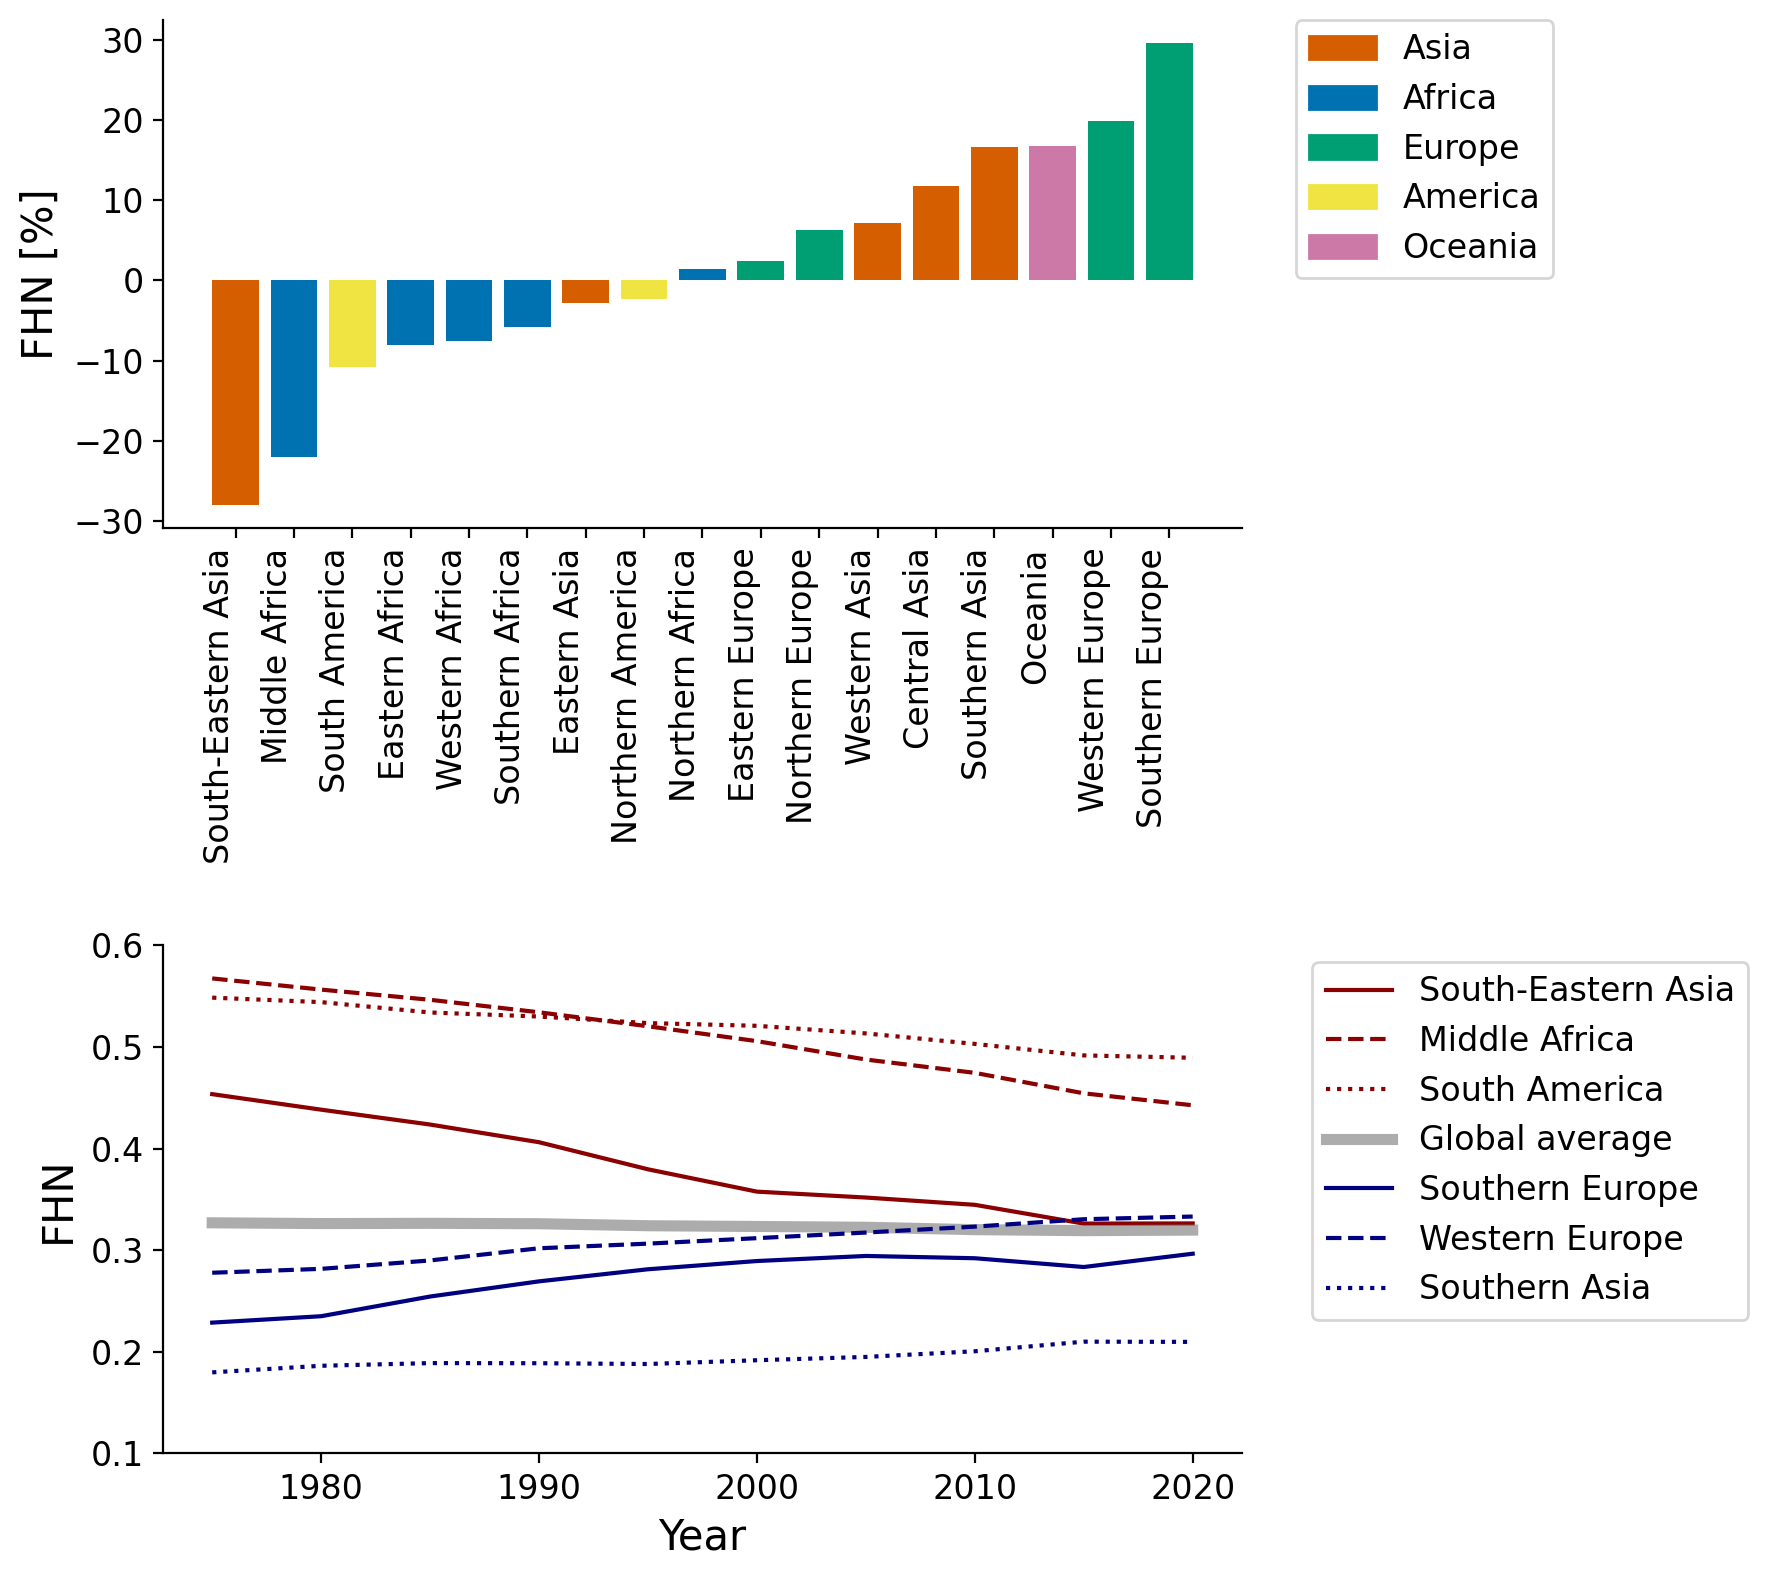

In [8]:
sel_regions1 = ['South-Eastern Asia', 'Middle Africa', 'South America']
sel_regions2 = ['Southern Europe', 'Western Europe', 'Southern Asia']

fig, axs = plt.subplots(2,1, figsize=(9, 8))

ax=axs[0]
df5_ = returnRelChange(df5, 'mean')
df5_ = df5_.sort_values(by='relative_change').reset_index(drop=True)
colors = df5_['region'].map(region_to_continent).map(continent_colors)

ax = set_font(ax, 12)
ax.bar(df5_['region'], df5_['relative_change'], color=colors)
# Adding labels and title
ax.set_xlabel(' ')
ax.set_ylabel('FHN [%]', size=15)
#ax.set_title('Forest Human Nexus change', size=16)
plt.grid(axis='y')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Creating legend patches
patches = [mpatches.Patch(color=color, label=continent) for continent, color in continent_colors.items()]
ax.set_xticklabels(df5_['region'], rotation=90, ha='right')
ax.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=12)


ax=axs[1]
ax = set_font(ax, 12)


# Plot each region individually with custom colors and linestyles
for region in sel_regions1:
    region_data = df5[df5['region'] == region]
    ax.plot(region_data['year'], region_data['mean'], 
            label=region, color='darkred', linestyle=linestyles[region])

dfmean = df5.groupby('year')['mean'].mean().reset_index()
dfmean.plot(x='year', y='mean', ax=ax, color='gray', lw=4, alpha=0.65, label='Global average')

for region in sel_regions2:
    region_data = df5[df5['region'] == region]
    ax.plot(region_data['year'], region_data['mean'], 
            label=region, color='navy', linestyle=linestyles[region])

# Customize legend
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add labels and title if necessary
ax.set_xlabel('Year', size=15)
ax.set_ylabel('FHN', size=15)
#ax.set_title('Temporal value of FHN', size=16)

ax.set_ylim([0.1, 0.6])

fig.tight_layout()

In [9]:
fig.savefig("../Figures/FHN_temporal.pdf", dpi=300, bbox_inches = 'tight')

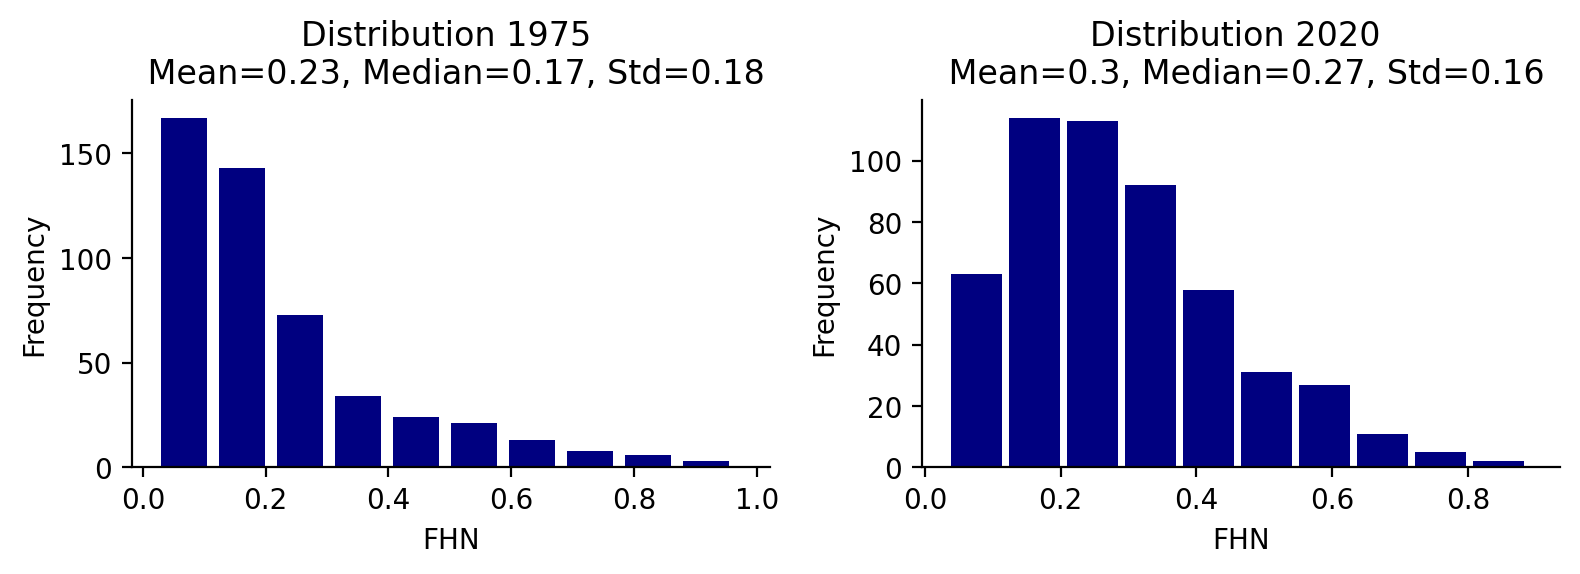

In [10]:
df = df5.copy()
region = 'Southern Europe'
df_ = df[df['region']==region]
f,axs=plt.subplots(1,2, figsize=(8, 3))
ax=axs[0]
year = 1975
df1 = df_[df_['year']==year].reset_index(drop=True)
ax.hist(df1['all_vals'], color='navy', width=0.075)
# Adding labels and title
ax.set_xlabel('FHN')
ax.set_ylabel('Frequency')
m = np.mean(df1['all_vals'][0])
std = np.std(df1['all_vals'][0])
med = np.median(df1['all_vals'][0])
ax.set_title(f'Distribution {year} \n Mean={m:.2g}, Median={med:.2g}, Std={std:.2g}', size=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax=axs[1]
year = 2020
df1 = df_[df_['year']==year].reset_index(drop=True)
ax.hist(df1['all_vals'], color='navy', width=0.075)
# Adding labels and title
ax.set_xlabel('FHN')
ax.set_ylabel('Frequency')
m = np.mean(df1['all_vals'][0])
std = np.std(df1['all_vals'][0])
med = np.median(df1['all_vals'][0])
ax.set_title(f'Distribution {year} \n Mean={m:.2g}, Median={med:.2g}, Std={std:.2g}', size=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
f.tight_layout()

In [11]:
f.savefig("../Figures/southeurope.pdf", dpi=300, bbox_inches = 'tight')

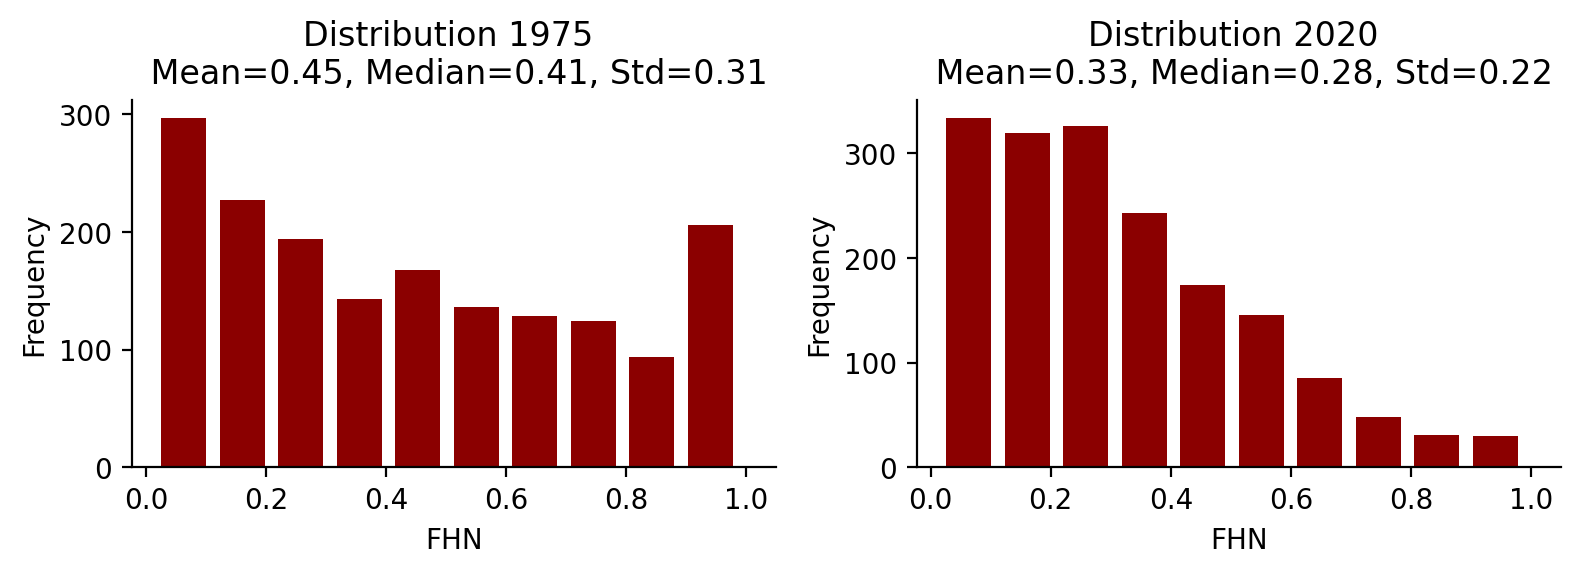

In [12]:
df = df5.copy()
region = 'South-Eastern Asia'
df_ = df[df['region']==region]
f,axs=plt.subplots(1,2, figsize=(8, 3))
ax=axs[0]
year = 1975
df1 = df_[df_['year']==year].reset_index(drop=True)
ax.hist(df1['all_vals'], color='darkred', width=0.075)
# Adding labels and title
ax.set_xlabel('FHN')
ax.set_ylabel('Frequency')
m = np.mean(df1['all_vals'][0])
std = np.std(df1['all_vals'][0])
med = np.median(df1['all_vals'][0])
ax.set_title(f'Distribution {year} \n Mean={m:.2g}, Median={med:.2g}, Std={std:.2g}', size=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax=axs[1]
year = 2020
df1 = df_[df_['year']==year].reset_index(drop=True)
ax.hist(df1['all_vals'], color='darkred', width=0.075)
# Adding labels and title
ax.set_xlabel('FHN')
ax.set_ylabel('Frequency')
m = np.mean(df1['all_vals'][0])
std = np.std(df1['all_vals'][0])
med = np.median(df1['all_vals'][0])
ax.set_title(f'Distribution {year} \n Mean={m:.2g}, Median={med:.2g}, Std={std:.2g}', size=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
f.tight_layout()

In [13]:
f.savefig("../Figures/southeastasia.pdf", dpi=300, bbox_inches = 'tight')

In [14]:
def shift_function(data1, data2, quantiles=None):
    """
    Compute the shift function between two datasets.
    
    Parameters:
    - data1: Array-like, the first dataset.
    - data2: Array-like, the second dataset.
    - quantiles: Array-like, specific quantiles to evaluate. If None, default is 100 quantiles.

    Returns:
    - quantiles: Array of quantiles.
    - shifts: The difference between the quantiles of data2 and data1.
    """
    # Sort the data
    data1 = np.sort(data1)
    data2 = np.sort(data2)

    # Define quantiles if not provided
    if quantiles is None:
        quantiles = np.linspace(0.01, 0.99, 100)
    
    # Compute quantiles for both datasets
    q1 = np.quantile(data1, quantiles)
    q2 = np.quantile(data2, quantiles)
    
    # Compute the shift
    shifts = q2 - q1
    
    return quantiles, shifts

-0.1271481954500018


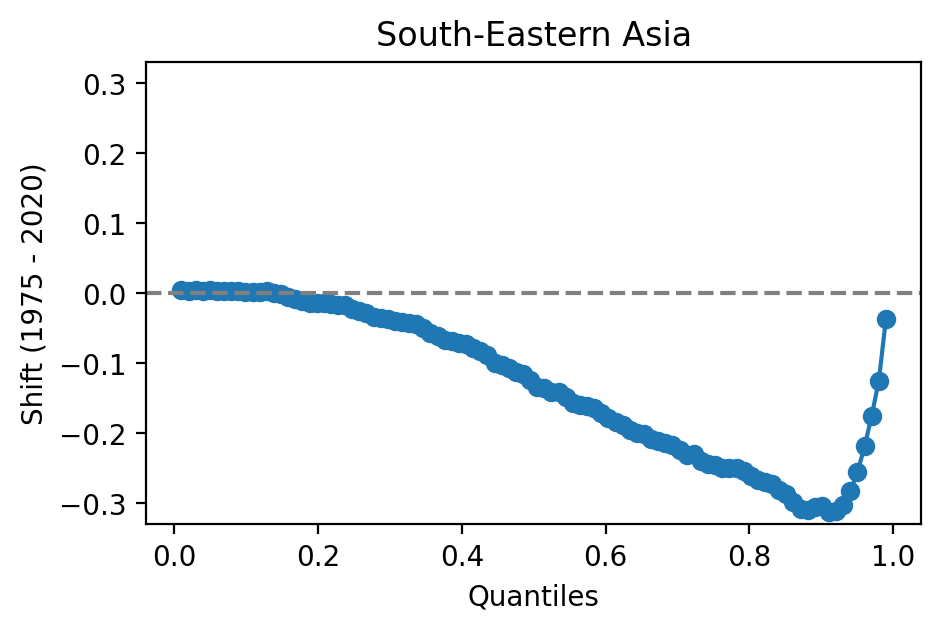

In [15]:
region = 'South-Eastern Asia'
df_ = df[df['region']==region]
year = 1975
df1 = df_[df_['year']==year].reset_index(drop=True)
data1 = df1['all_vals'][0]

year = 2020
df1 = df_[df_['year']==year].reset_index(drop=True)
data2 = df1['all_vals'][0]
# Compute the shift function
quantiles, shifts = shift_function(data1, data2)

print(np.trapz(shifts, quantiles))
# Plotting the shift function
f,ax = plt.subplots(figsize=(5, 3))
plt.plot(quantiles, shifts, marker='o')
plt.axhline(0, color='grey', linestyle='--')
plt.xlabel('Quantiles')
plt.ylabel('Shift (1975 - 2020)')
plt.title(f'{region}')
plt.ylim([-0.33, 0.33])
plt.show()

In [16]:
f.savefig("../Figures/southeastasia_shift.pdf", dpi=300, bbox_inches = 'tight')

0.0690076776068288


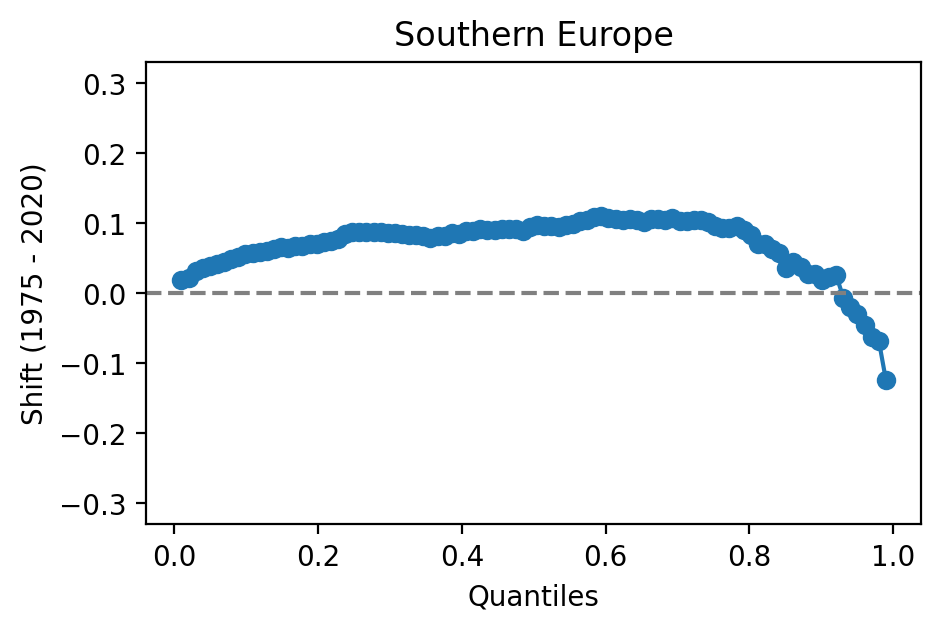

In [17]:
region = 'Southern Europe'
df_ = df[df['region']==region]
year = 1975
df1 = df_[df_['year']==year].reset_index(drop=True)
data1 = df1['all_vals'][0]

year = 2020
df1 = df_[df_['year']==year].reset_index(drop=True)
data2 = df1['all_vals'][0]
# Compute the shift function
quantiles, shifts = shift_function(data1, data2)

print(np.trapz(shifts, quantiles))
# Plotting the shift function
f,ax = plt.subplots(figsize=(5, 3))
plt.plot(quantiles, shifts, marker='o')
plt.axhline(0, color='grey', linestyle='--')
plt.xlabel('Quantiles')
plt.ylabel('Shift (1975 - 2020)')
plt.title(f'{region}')
plt.ylim([-0.33, 0.33])
plt.show()

In [18]:
f.savefig("../Figures/southerneurope_shift.pdf", dpi=300, bbox_inches = 'tight')

In [19]:
REGIONS = gdf1['custom_reg'].unique()
df = df5.copy()
A = []
for region in REGIONS:
    df_ = df[df['region']==region]
    year = 1975
    df1 = df_[df_['year']==year].reset_index(drop=True)
    data1 = df1['all_vals'][0]
    
    year = 2020
    df1 = df_[df_['year']==year].reset_index(drop=True)
    data2 = df1['all_vals'][0]
    
    # Compute the shift function
    quantiles, shifts = shift_function(data1, data2)
    A.append(np.trapz(shifts, quantiles))

In [20]:
dfs = pd.DataFrame()
dfs['region'] = REGIONS
dfs['shift'] = A

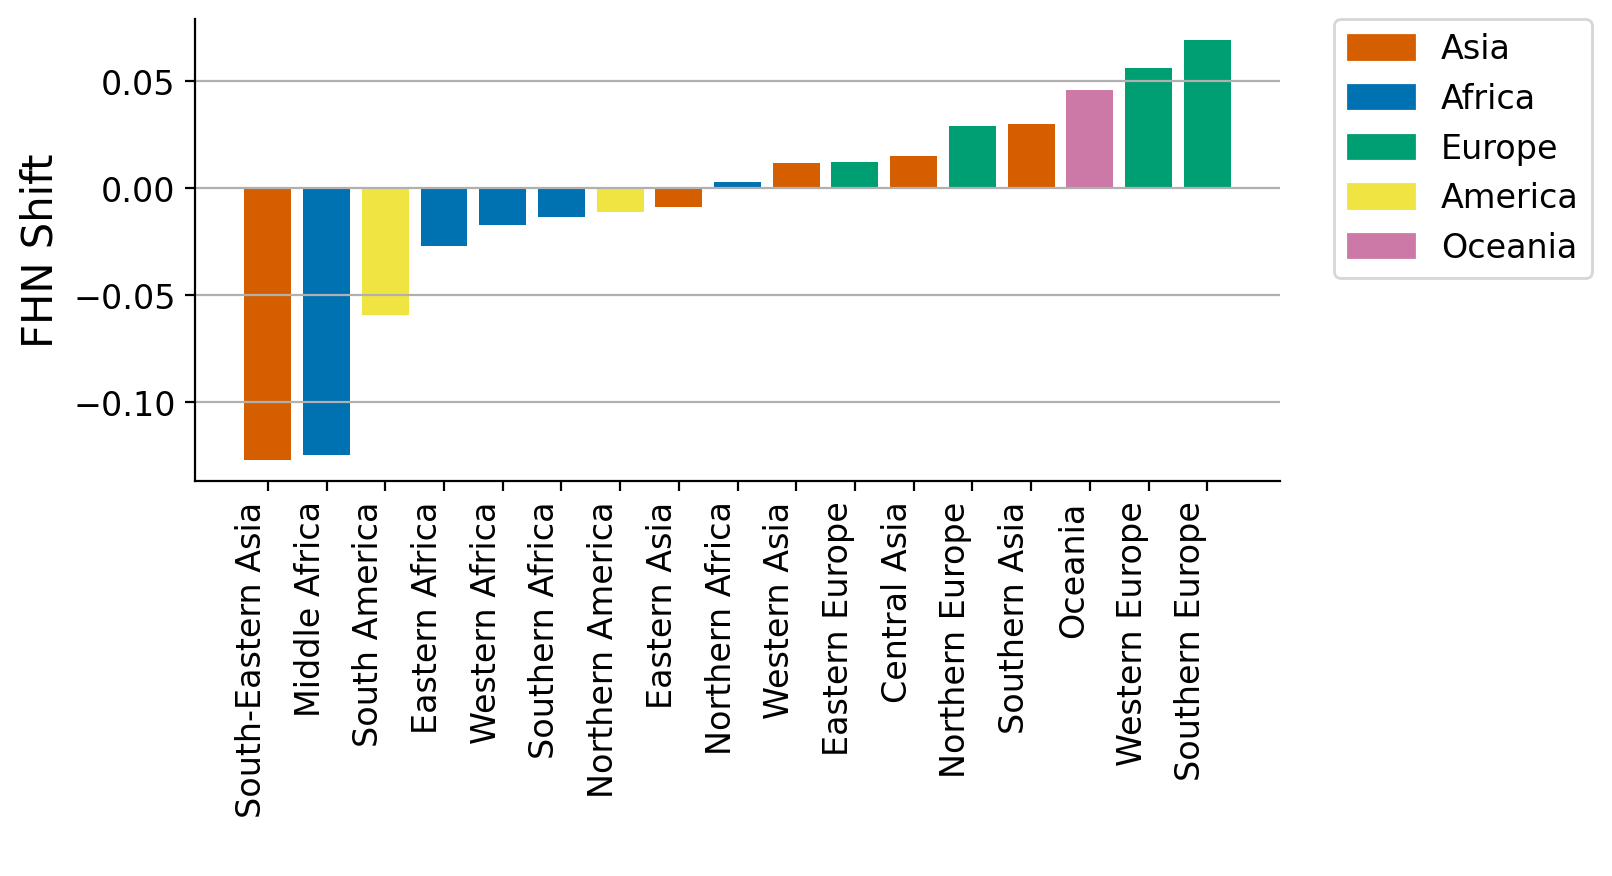

In [21]:
fig, ax = plt.subplots(figsize=(7, 3))

dfs = dfs.sort_values(by='shift').reset_index(drop=True)
colors = dfs['region'].map(region_to_continent).map(continent_colors)

ax = set_font(ax, 12)
ax.bar(dfs['region'], dfs['shift'], color=colors)
# Adding labels and title
ax.set_xlabel(' ')
ax.set_ylabel('FHN Shift', size=15)
#ax.set_title('Forest Human Nexus change', size=16)
plt.grid(axis='y')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Creating legend patches
patches = [mpatches.Patch(color=color, label=continent) for continent, color in continent_colors.items()]
ax.set_xticklabels(dfs['region'], rotation=90, ha='right')
ax.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=12)


In [22]:
f.savefig("../Figures/worldshift.pdf", dpi=300, bbox_inches = 'tight')

In [24]:
dfs = pd.merge(dfs, df5_, on='region')

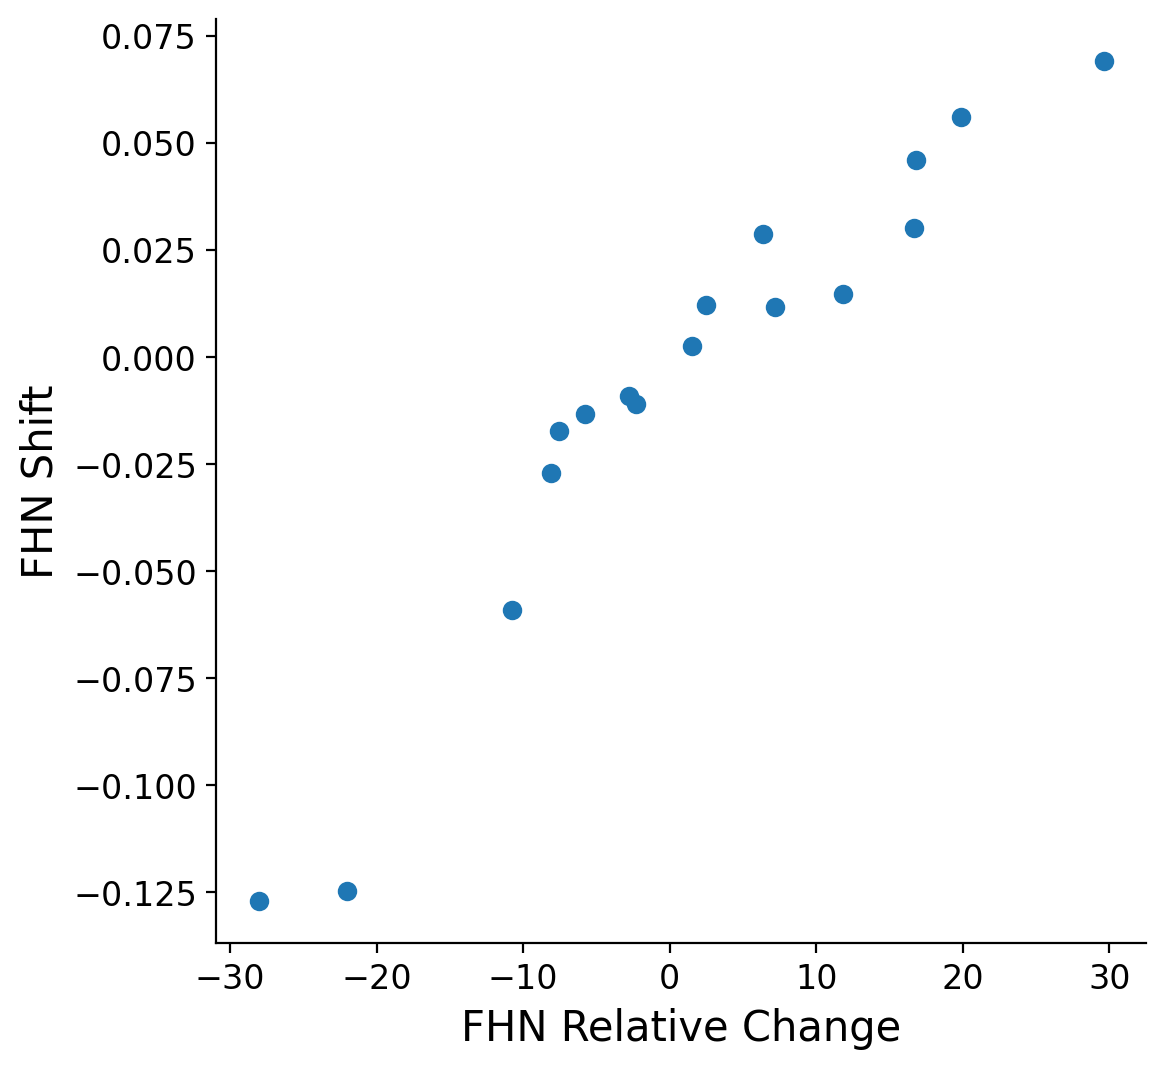

In [25]:
fig, ax = plt.subplots(figsize=(6, 6))
ax = set_font(ax, 12)
plt.scatter(dfs['relative_change'], dfs['shift'])
ax.set_ylabel('FHN Shift', size=15)
ax.set_xlabel('FHN Relative Change', size=15)
#ax.set_title('Forest Human Nexus change', size=16)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


In [26]:
f.savefig("../Figures/shift_change.pdf", dpi=300, bbox_inches = 'tight')